In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely import wkt



In [23]:
df_coles = pd.read_csv('data/data_aprobados_colegio_barrio_2022.csv', sep=';', encoding='latin1')

df_coles_bcn = df_coles[df_coles['Municipi']=='BARCELONA']

df_coles_bcn

,Curs,Estudi,Codi àrea territorial,Àrea territorial,Codi comarca,Comarca,Codi municipi,Municipi,Codi districte,Naturalesa,Titularitat,Nivell,Sexe,Concert,Resultat de l'avaluació,Alumnes avaluats
0,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,PRIVAT,FUNDACIONS,1,DONA,SI,PROMOCIONEN SENSE PENDENTS,17
1,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,PRIVAT,FUNDACIONS,1,HOME,SI,PROMOCIONEN AMB PENDENTS,5
2,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,PRIVAT,FUNDACIONS,1,HOME,SI,PROMOCIONEN SENSE PENDENTS,38
3,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,PRIVAT,FUNDACIONS,2,DONA,SI,NO PROMOCIONEN,1
4,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,PRIVAT,FUNDACIONS,2,DONA,SI,PROMOCIONEN AMB PENDENTS,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1182,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801910,PÚBLIC,DEPARTAMENT D'EDUCACIÓ,4,DONA,NaN,PROMOCIONEN AMB PENDENTS,143
1183,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801910,PÚBLIC,DEPARTAMENT D'EDUCACIÓ,4,DONA,NaN,PROMOCIONEN SENSE PENDENTS,350
1184,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801910,PÚBLIC,DEPARTAMENT D'EDUCACIÓ,4,HOME,NaN,NO PROMOCIONEN,88
1185,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801910,PÚBLIC,DEPARTAMENT D'EDUCACIÓ,4,HOME,NaN,PROMOCIONEN AMB PENDENTS,167


In [24]:
df_coles_bcn_publicos = df_coles_bcn[df_coles_bcn['Naturalesa']=='PÚBLIC']
df_coles_bcn_privats = df_coles_bcn[df_coles_bcn['Naturalesa']=='PRIVAT']

df_promocionan_publics = df_coles_bcn_publicos[df_coles_bcn_publicos['Resultat de l\'avaluació']=='PROMOCIONEN SENSE PENDENTS']
df_pendientes_publics = df_coles_bcn_publicos[df_coles_bcn_publicos['Resultat de l\'avaluació']=='PROMOCIONEN AMB PENDENTS']
df_nop_publics = df_coles_bcn_publicos[df_coles_bcn_publicos['Resultat de l\'avaluació']=='NO PROMOCIONEN']

df_promocionan_privats = df_coles_bcn_privats[df_coles_bcn_privats['Resultat de l\'avaluació']=='PROMOCIONEN SENSE PENDENTS']
df_pendientes_privats = df_coles_bcn_privats[df_coles_bcn_privats['Resultat de l\'avaluació']=='PROMOCIONEN AMB PENDENTS']
df_nop_privats = df_coles_bcn_privats[df_coles_bcn_privats['Resultat de l\'avaluació']=='NO PROMOCIONEN']

count_promo_publics = df_promocionan_publics['Alumnes avaluats'].sum()
count_promo_privats = df_promocionan_privats['Alumnes avaluats'].sum()

count_pendents_publics = df_pendientes_publics['Alumnes avaluats'].sum()
count_pendents_privats = df_pendientes_privats['Alumnes avaluats'].sum()

count_nop_publics = df_nop_publics['Alumnes avaluats'].sum()
count_nop_privats = df_nop_privats['Alumnes avaluats'].sum()


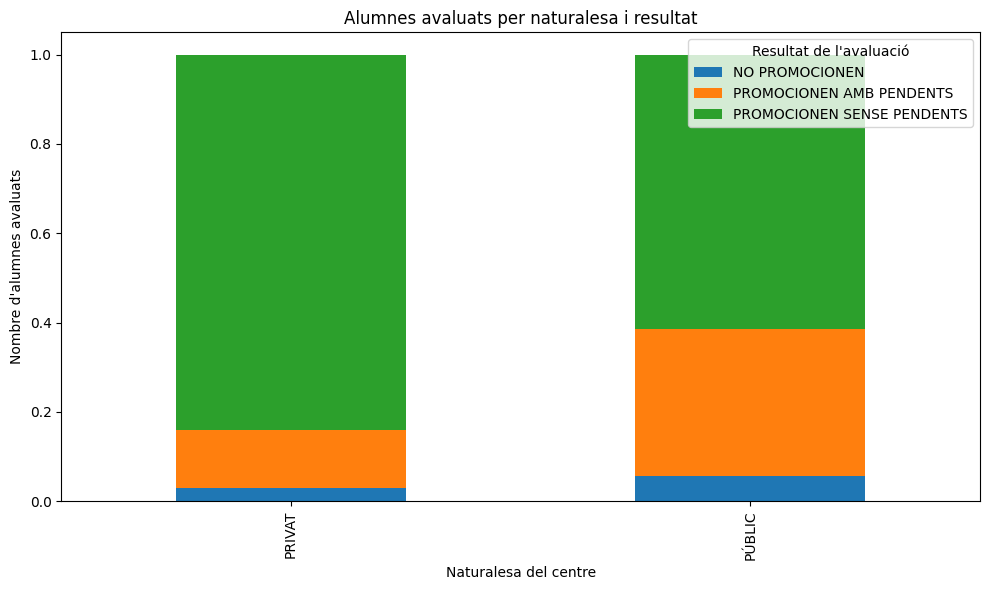

In [25]:
df_grafico = df_coles_bcn[['Naturalesa','Resultat de l\'avaluació','Alumnes avaluats']]

df_grouped = df_grafico.groupby(['Naturalesa', "Resultat de l'avaluació"])['Alumnes avaluats'].sum().unstack()

df_frac = df_grouped.div(df_grouped.sum(axis=1),axis=0)

df_frac.plot(kind='bar', stacked=True, figsize=(10,6))

plt.title("Alumnes avaluats per naturalesa i resultat")
plt.xlabel("Naturalesa del centre")
plt.ylabel("Nombre d'alumnes avaluats")
plt.legend(title="Resultat de l'avaluació")
plt.tight_layout()
plt.show()


In [26]:

df_renta_2022 = pd.read_csv('data/2022_renda_disponible_llars_per_persona.csv')

df_renta_media_barrio2022 = df_renta_2022.groupby('Nom_Barri')['Import_Euros'].mean().reset_index()




   codi_districte nom_districte  codi_barri  \
0               1  Ciutat Vella           1   
1               1  Ciutat Vella           2   
2               1  Ciutat Vella           3   
3               1  Ciutat Vella           4   
4               2      Eixample           5   

                               nom_barri  \
0                               el Raval   
1                         el Barri Gòtic   
2                         la Barceloneta   
3  Sant Pere, Santa Caterina i la Ribera   
4                          el Fort Pienc   

                                    geometria_etrs89  \
0  POLYGON ((430162.1875 4581936.9845, 430102.838...   
1  POLYGON ((431189.9075 4581851.4475, 431025.789...   
2  POLYGON ((432798.7341255 4582081.2599495, 4327...   
3  POLYGON ((431733.736 4582441.816, 431557.5115 ...   
4  POLYGON ((431741.8152 4582625.6491, 432012.183...   

                                     geometria_wgs84  \
0  POLYGON ((2.16471378585589 41.3859301967194, 2...   
1  

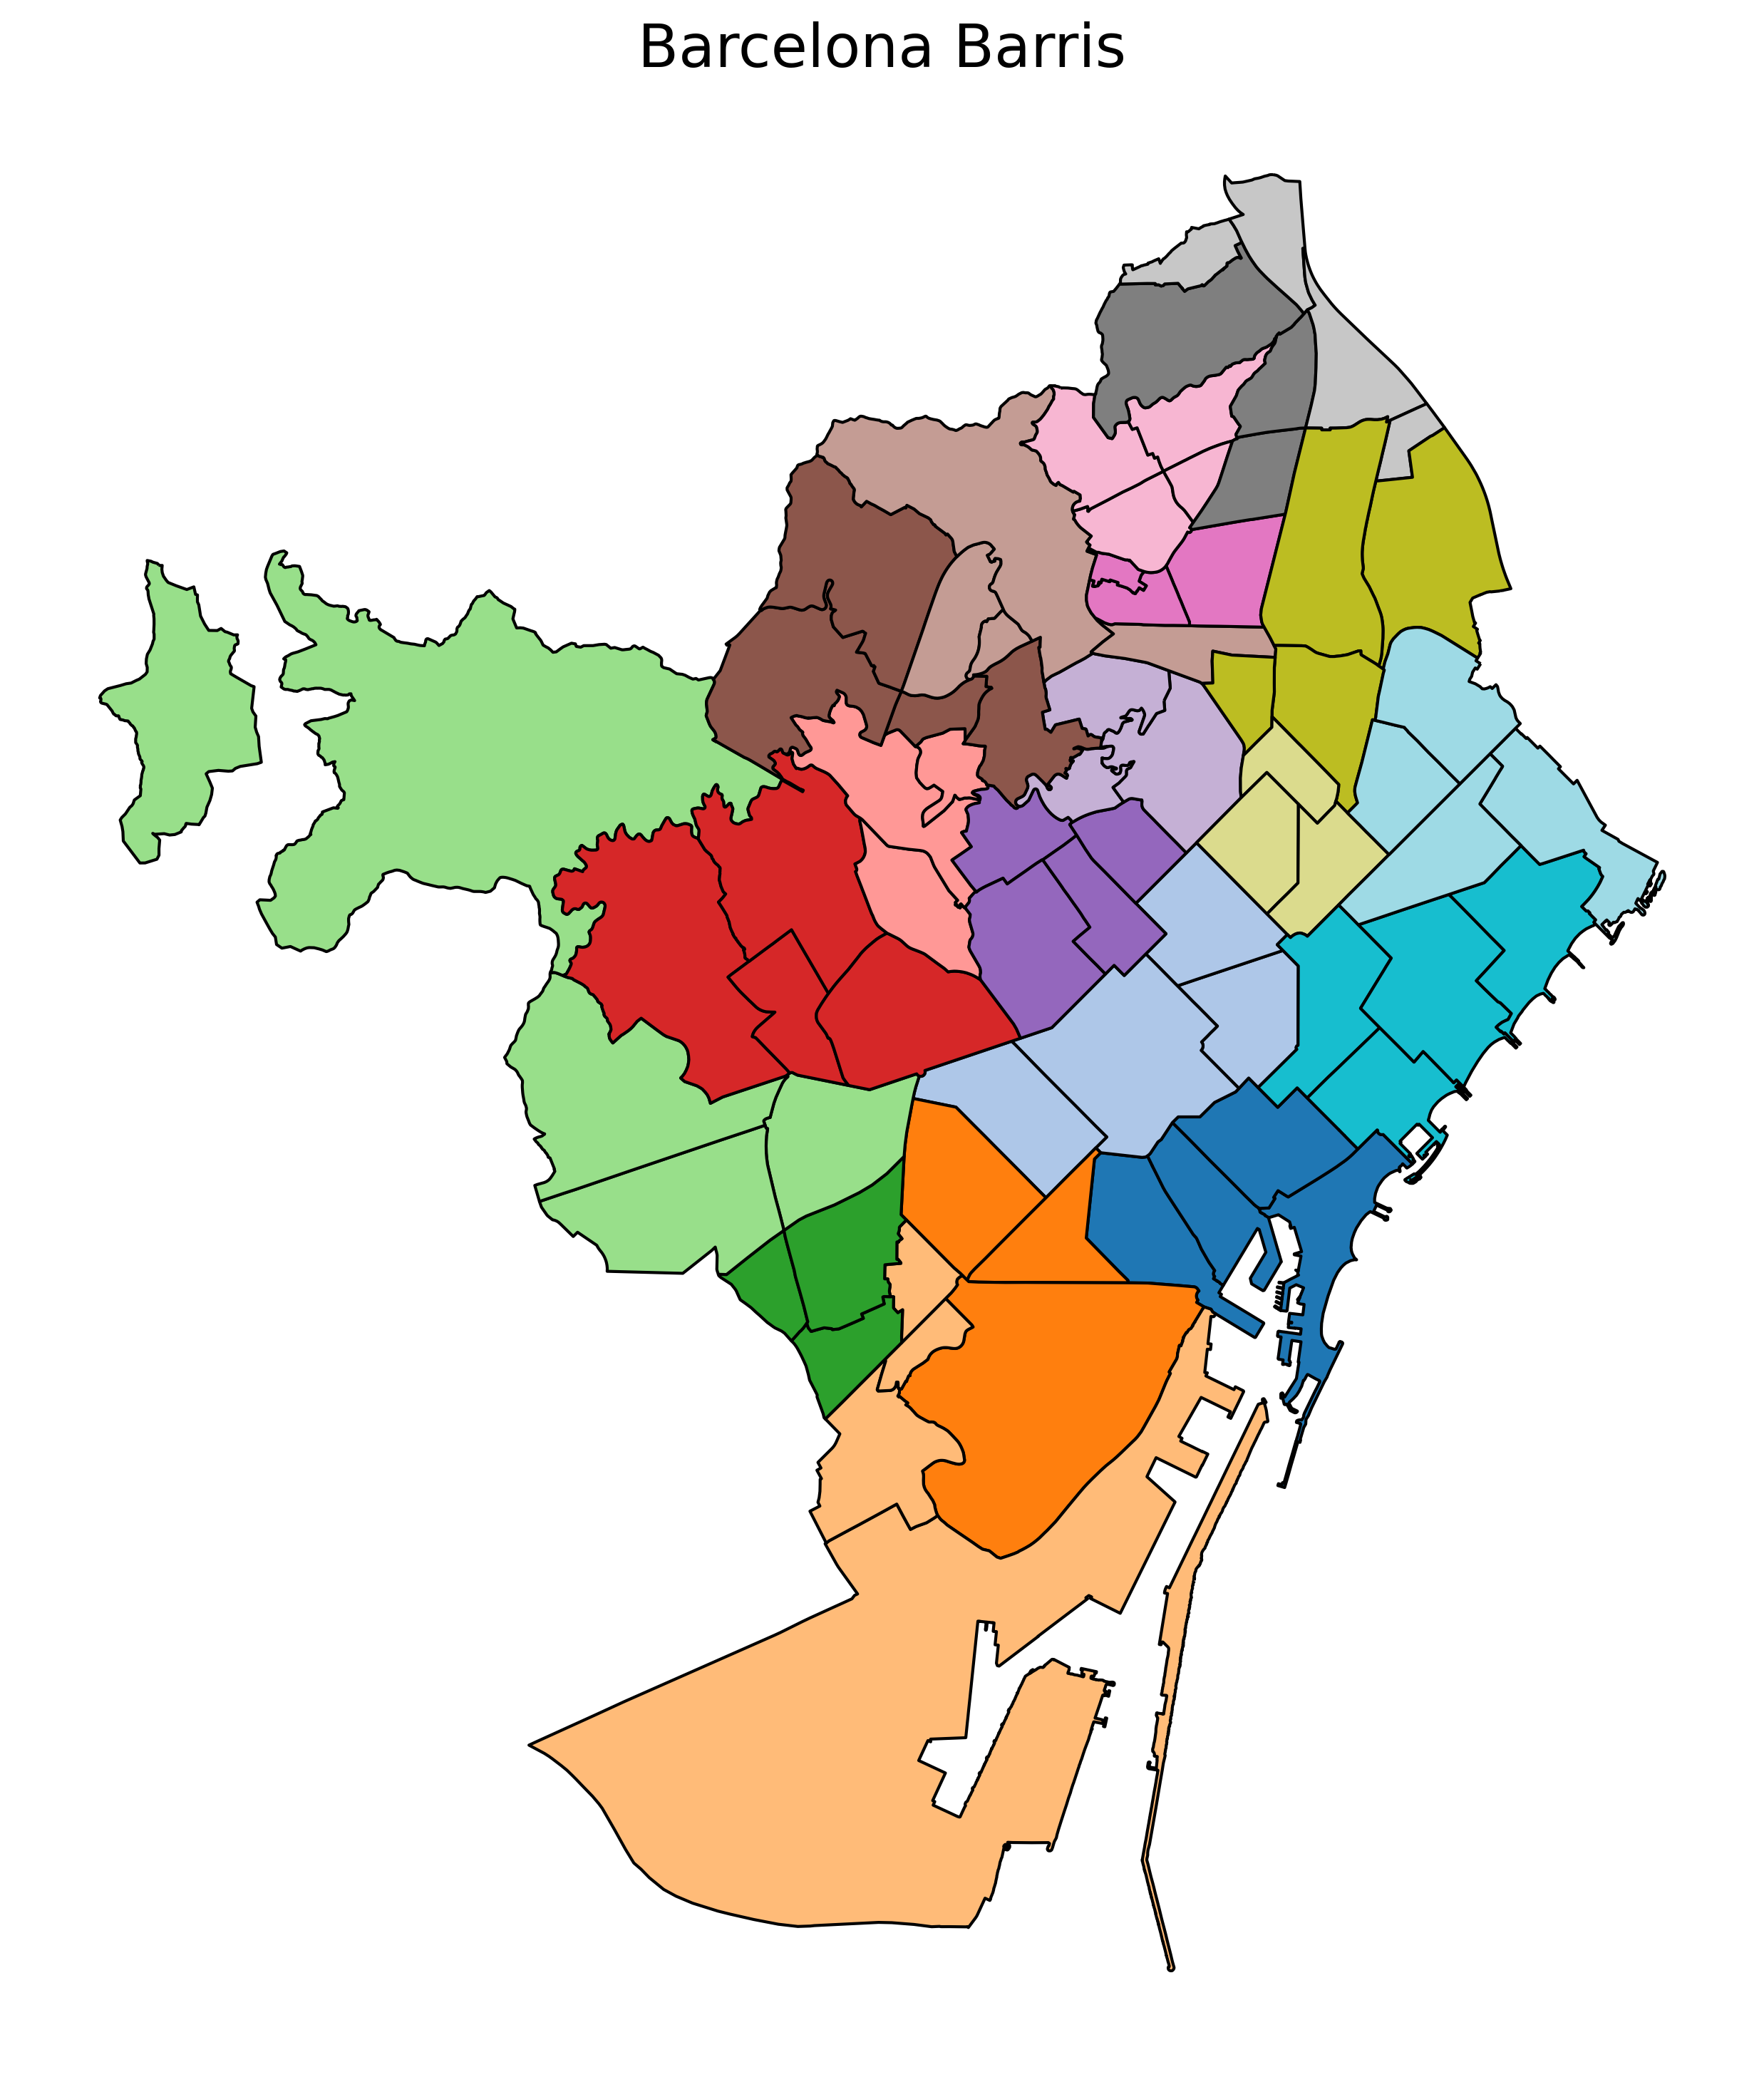

In [27]:
df_barris = pd.read_csv("data/BarcelonaCiutat_Barris.csv")

df_barris['geometry'] = df_barris['geometria_etrs89'].apply(wkt.loads)

barris = gpd.GeoDataFrame(df_barris, geometry='geometry')
barris.set_crs(epsg=25831, inplace=True) #assings a coordinate reference system. 25831 is the one commonly used for bcn
barris = barris.to_crs(epsg=4326)
"""
set_crs() Label your coordinates with the correct system
to_crs() Convert your coordinates into a new system
"""
print(barris.head())
print(barris.columns)
print(barris.crs)

fig, ax = plt.subplots(figsize=(12,12), dpi=300)
barris.plot(ax=ax, edgecolor='black', cmap='tab20')
plt.title("Barcelona Barris", fontsize=20)
plt.axis('off')
plt.show()

barris.to_file("barcelona_barris_clean.geojson", driver="GeoJSON")
barris.to_file("data/barcelona_barris_clean.geojson", driver="GeoJSON")


In [34]:
gdf_barris = gpd.read_file('barcelona_barris_clean.geojson')

gdf_barris.columns
df_renta_media_barrio2022.columns

Index(['Nom_Barri', 'Import_Euros'], dtype='object')

In [31]:
gdf_renta_barrios = gdf_barris.merge(df_renta_media_barrio2022,
                       left_on="nom_barri",
                       right_on="Nom_Barri")



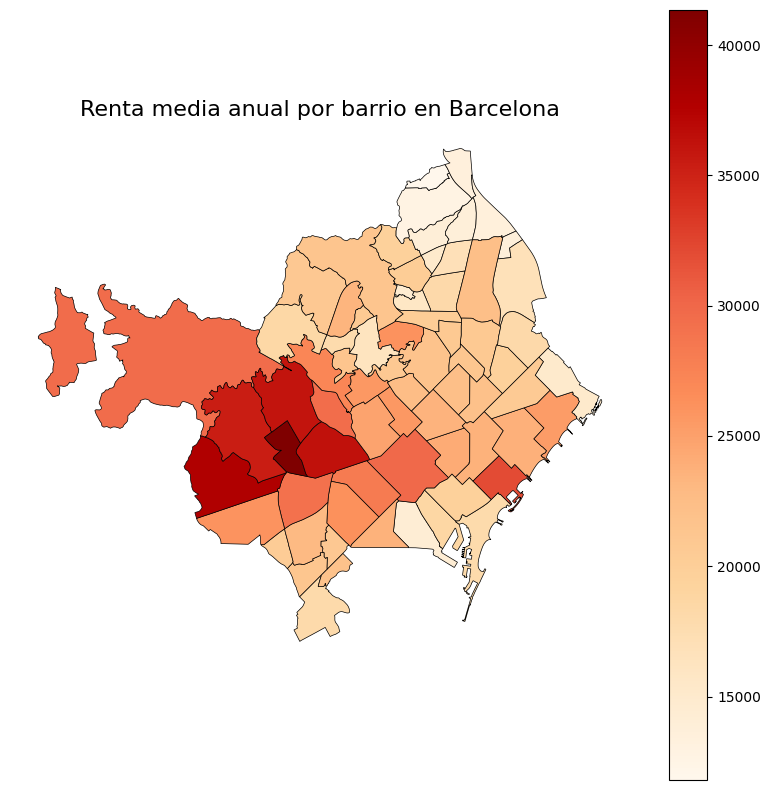

In [36]:
fig, ax = plt.subplots(figsize=(10, 10))

gdf_renta_barrios.plot(column="Import_Euros",
         cmap="OrRd",
         linewidth=0.5,
         edgecolor="black",
         legend=True,
         ax=ax)

ax.set_title("Renta media anual por barrio en Barcelona", fontsize=16)
ax.axis("off")

plt.show()